In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('Agg')

import sklearn
import imblearn
import us
    

from sklearn.metrics import *
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression as lor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

import catboost
from catboost import CatBoostClassifier
import seaborn as sns

from sklearn.model_selection import GridSearchCV


import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings("ignore")

# 1.1 Problem Objective and Data Brief

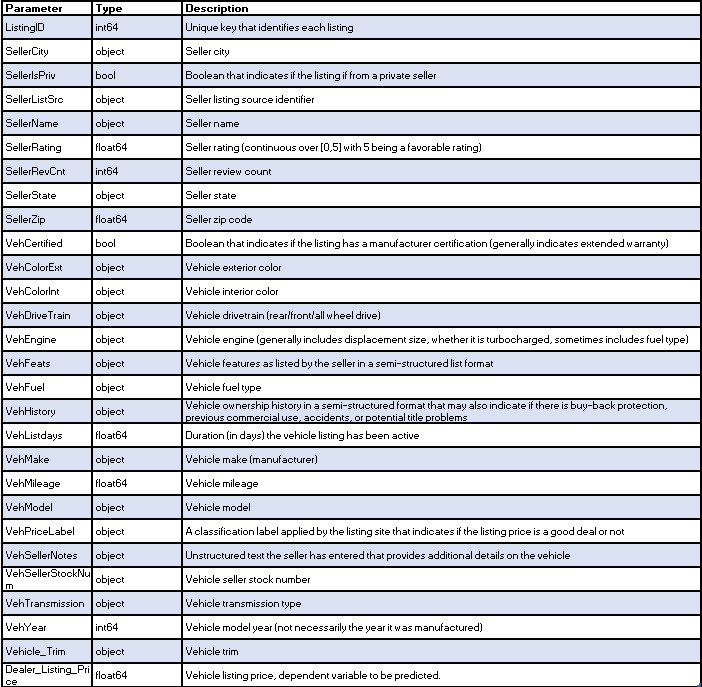

# 1.2 Data Load Steps

In [2]:
path_m = os.getcwd()

In [3]:
def dir_up(path,n):
    for _ in range(n):
        path = dir_up(path.rpartition("\\")[0], 0)
    return(path)

In [4]:
path_d = os.path.join(dir_up(path_m,1),'Data')
df_actual = pd.read_csv(os.path.join(path_d,'Training_DataSet.csv'))
df_actual = df_actual

In [5]:
print("A snapshot of the data looks like this - ")
df_actual.head()

A snapshot of the data looks like this - 


,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [6]:
print("The data contains the following columns:\n\n",np.array(df_actual.columns))

The data contains the following columns:

 ['ListingID' 'SellerCity' 'SellerIsPriv' 'SellerListSrc' 'SellerName'
 'SellerRating' 'SellerRevCnt' 'SellerState' 'SellerZip' 'VehBodystyle'
 'VehCertified' 'VehColorExt' 'VehColorInt' 'VehDriveTrain' 'VehEngine'
 'VehFeats' 'VehFuel' 'VehHistory' 'VehListdays' 'VehMake' 'VehMileage'
 'VehModel' 'VehPriceLabel' 'VehSellerNotes' 'VehType' 'VehTransmission'
 'VehYear' 'Vehicle_Trim' 'Dealer_Listing_Price']


# 1.3 Data Manipulation and Functions

In [7]:
#df_actual = df_actual.set_index('ListingID')

In [8]:
varlist = ['ListingID','SellerState', 'SellerIsPriv', 'SellerListSrc',\
            'VehCertified', 'VehDriveTrain', 'VehFuel', 'VehMake', 'VehModel',\
            'VehPriceLabel', 'VehYear', 'VehMileage', 'SellerRating',\
           'SellerRevCnt', 'VehListdays','Dealer_Listing_Price']

In [9]:
df_actual = df_actual[varlist]
df_actual.isna().sum()

ListingID                 0
SellerState               0
SellerIsPriv              0
SellerListSrc             2
VehCertified              0
VehDriveTrain           401
VehFuel                   2
VehMake                   0
VehModel                  0
VehPriceLabel           285
VehYear                   0
VehMileage                2
SellerRating              0
SellerRevCnt              0
VehListdays               2
Dealer_Listing_Price     52
dtype: int64

In [10]:
df_actual.shape

(6298, 16)

In [11]:
df_actual = df_actual[~(df_actual.Dealer_Listing_Price.isna())]

In [12]:
df_actual.shape

(6246, 16)

In [13]:
df_actual[varlist].isna().sum()

ListingID                 0
SellerState               0
SellerIsPriv              0
SellerListSrc             2
VehCertified              0
VehDriveTrain           401
VehFuel                   2
VehMake                   0
VehModel                  0
VehPriceLabel           233
VehYear                   0
VehMileage                0
SellerRating              0
SellerRevCnt              0
VehListdays               2
Dealer_Listing_Price      0
dtype: int64

### 1.3.1 Data Aggregation functions

In [14]:
## Seller State

def sellerstate(df):
    states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}
    
    sr_df = pd.DataFrame(states_to_regions,index=[0])
    sr_df = sr_df.T.reset_index()
    sr_df.columns = ['States','Region']
    
    ## importing us package
    

    s_df = us.states.mapping('abbr', 'name')
    s_df = pd.DataFrame(s_df,index=[0])
    s_df2 = s_df.T.reset_index()
    s_df2.columns=['Abbr','States']
    
    revised_region = pd.merge(s_df2,sr_df,on='States',how='inner')
    revised_region = revised_region[['Abbr','Region']]
    revised_region.columns = ['SellerState','Region']
    
    df = pd.merge(df,revised_region,how='inner',on='SellerState')
    
    df = df.drop(['SellerState'], axis=1)
    
    return df
    
    

In [15]:
df_actual_r = sellerstate(df_actual)
df_actual_r.shape

(6246, 16)

In [16]:
df_actual_r.columns

Index(['ListingID', 'SellerIsPriv', 'SellerListSrc', 'VehCertified',
       'VehDriveTrain', 'VehFuel', 'VehMake', 'VehModel', 'VehPriceLabel',
       'VehYear', 'VehMileage', 'SellerRating', 'SellerRevCnt', 'VehListdays',
       'Dealer_Listing_Price', 'Region'],
      dtype='object')

In [17]:
## SellerisPriv

def sellerisPriv(df):
    df['SellerIsPriv'] = df['SellerIsPriv'] * 1
    return df
    

In [18]:
df_actual_r = sellerisPriv(df_actual_r)
df_actual_r.head(2)

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehYear,VehMileage,SellerRating,SellerRevCnt,VehListdays,Dealer_Listing_Price,Region
0,3287,0,Inventory Command Center,False,4X4,Gasoline,Jeep,Grand Cherokee,Fair Price,2015,39319.0,5.0,32,8.600069,30990.0,Midwest
1,38149,0,Digital Motorworks (DMi),False,4WD,Gasoline,Jeep,Grand Cherokee,Good Deal,2015,35990.0,4.9,865,18.920764,31750.0,Midwest


In [19]:
## VehCertified

def vehcertified(df):
    df['VehCertified'] = df['VehCertified'] * 1
    return df

In [20]:
df_actual_r = vehcertified(df_actual_r)
df_actual_r.head(2)

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehYear,VehMileage,SellerRating,SellerRevCnt,VehListdays,Dealer_Listing_Price,Region
0,3287,0,Inventory Command Center,0,4X4,Gasoline,Jeep,Grand Cherokee,Fair Price,2015,39319.0,5.0,32,8.600069,30990.0,Midwest
1,38149,0,Digital Motorworks (DMi),0,4WD,Gasoline,Jeep,Grand Cherokee,Good Deal,2015,35990.0,4.9,865,18.920764,31750.0,Midwest


In [21]:
## VehDriveTrain

def vehdrivetrain(df):
    df['VehDriveTrain'] = df.apply(lambda row: 'AWD' if row['VehDriveTrain'] in (['ALL-WHEEL DRIVE','4X4', '4WD', 'AWD', 'AWD or 4x4','4x4/4-wheel drive','Four Wheel Drive', '4x4/4WD', '4x4', 'All Wheel Drive','All-wheel Drive','ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL','AllWheelDrive', '4WD/AWD','ALL WHEEL']) else 'FWD' if row['VehDriveTrain'] in (['2WD','Front-wheel Drive','Front Wheel Drive','FWD','FRONT-WHEEL DRIVE']) else row['VehDriveTrain'],axis=1)
    return df

In [22]:
df_actual_r = vehdrivetrain(df_actual_r)
df_actual_r.head(2)

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehYear,VehMileage,SellerRating,SellerRevCnt,VehListdays,Dealer_Listing_Price,Region
0,3287,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Fair Price,2015,39319.0,5.0,32,8.600069,30990.0,Midwest
1,38149,0,Digital Motorworks (DMi),0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,2015,35990.0,4.9,865,18.920764,31750.0,Midwest


In [23]:
df_actual_r.VehYear.unique()

array([2015, 2017, 2018, 2016, 2019], dtype=int64)

In [24]:
## VehYear

def vehTenure(df):
    df['VehTenure'] = df.apply(lambda row: 2023-row['VehYear'],axis=1)
    df = df.drop('VehYear',axis=1)
    return df

In [25]:
df_actual_r = vehTenure(df_actual_r)
df_actual_r.head(2)

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehMileage,SellerRating,SellerRevCnt,VehListdays,Dealer_Listing_Price,Region,VehTenure
0,3287,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Fair Price,39319.0,5.0,32,8.600069,30990.0,Midwest,8
1,38149,0,Digital Motorworks (DMi),0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,35990.0,4.9,865,18.920764,31750.0,Midwest,8


In [26]:
# def vehTrim(df):
#     df['Vehicle_Trim'] = df.apply(lambda row: 'Limited' if row['Vehicle_Trim'] in (['Laredo','Limited','Limited 4x4','FWD','SRT','Trailhawk','Laredo E','Trackhawk','75th Anniversary','SRT Night','Limited 75th Anniversary Edition','75th Anniversary Edition','Limited 75th Anniversary','Upland','Limited X']) else 'Luxury',axis=1)
#     return df

In [27]:
# df_actual_r = vehTrim(df_actual_r)
# df_actual_r.head(2)

### 1.3.2 Imputing Missing Values Functions

In [28]:
##impute missing values in Train data

## categorical variables

def missing_vcat(df,col):
    df_grouped = pd.DataFrame(df[col].value_counts()).reset_index()
    mode_val = df_grouped['index'][0]
    df[col] = df[col].fillna(mode_val)
    return df


## continuous variables

def missing_vcont(df,col):
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    return df
    

In [29]:
df_actual_r = df_actual_r.set_index('ListingID')

In [30]:
df_actual_r = df_actual_r[['SellerIsPriv', 'SellerListSrc', 'VehCertified', 'VehDriveTrain',\
               'VehFuel', 'VehMake', 'VehModel', 'VehPriceLabel', 'VehMileage',\
               'SellerRating', 'SellerRevCnt', 'VehListdays', 'VehTenure', 'Region',\
               'Dealer_Listing_Price']]

### 1.3.3 Imputing Missing Values

In [31]:
df_revised= missing_vcat(df_actual_r,'SellerListSrc')

df_revised = missing_vcat(df_actual_r,'VehDriveTrain')

df_revised = missing_vcat(df_actual_r,'VehFuel')

df_revised = missing_vcat(df_actual_r,'VehPriceLabel')

df_revised = missing_vcont(df_actual_r,'VehMileage')

df_revised= missing_vcont(df_actual_r,'VehListdays')

df_revised.head()

,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehMileage,SellerRating,SellerRevCnt,VehListdays,VehTenure,Region,Dealer_Listing_Price
ListingID,,,,,,,,,,,,,,,
3287,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Fair Price,39319.0,5.0,32,8.600069,8,Midwest,30990.0
38149,0,Digital Motorworks (DMi),0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,35990.0,4.9,865,18.920764,8,Midwest,31750.0
38723,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,12912.0,4.7,107,73.766007,6,Midwest,31992.0
90916,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,12589.0,4.7,107,95.771343,6,Midwest,31992.0
105329,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,36599.0,4.7,107,98.772870,8,Midwest,27950.0


In [32]:
### One hot encoding categorical variables

def get_dummies(df, col):
    dummy_df = pd.get_dummies(df[col], drop_first=False,prefix=col)
    return dummy_df

In [33]:
## Train data dummies

sls_dummy = get_dummies(df_revised, 'SellerListSrc')
vdt_dummy = get_dummies(df_revised, 'VehDriveTrain')
vf_dummy = get_dummies(df_revised, 'VehFuel')
vm_dummy = get_dummies(df_revised, 'VehMake')
vmo_dummy = get_dummies(df_revised, 'VehModel')
vp_dummy = get_dummies(df_revised, 'VehPriceLabel')
r_dummy = get_dummies(df_revised, 'Region')


df_model = pd.concat([sls_dummy, vdt_dummy, vf_dummy, vm_dummy, vmo_dummy, vp_dummy, r_dummy, df_revised[['SellerIsPriv', 'VehCertified', 'VehMileage', 'SellerRating', 'SellerRevCnt', 'VehListdays', 'VehTenure','Dealer_Listing_Price']]], axis=1)

df_model.head()

,SellerListSrc_Cadillac Certified Program,SellerListSrc_Digital Motorworks (DMi),SellerListSrc_Five Star Certified Program,SellerListSrc_HomeNet Automotive,SellerListSrc_Inventory Command Center,SellerListSrc_Jeep Certified Program,SellerListSrc_My Dealer Center,SellerListSrc_Sell It Yourself,VehDriveTrain_AWD,VehDriveTrain_FWD,...,Region_Southwest,Region_West,SellerIsPriv,VehCertified,VehMileage,SellerRating,SellerRevCnt,VehListdays,VehTenure,Dealer_Listing_Price
ListingID,,,,,,,,,,,,,,,,,,,,,
3287,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,39319.0,5.0,32,8.600069,8,30990.0
38149,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,35990.0,4.9,865,18.920764,8,31750.0
38723,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,12912.0,4.7,107,73.766007,6,31992.0
90916,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,12589.0,4.7,107,95.771343,6,31992.0
105329,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,36599.0,4.7,107,98.772870,8,27950.0


In [34]:
df_model.columns

Index(['SellerListSrc_Cadillac Certified Program',
       'SellerListSrc_Digital Motorworks (DMi)',
       'SellerListSrc_Five Star Certified Program',
       'SellerListSrc_HomeNet Automotive',
       'SellerListSrc_Inventory Command Center',
       'SellerListSrc_Jeep Certified Program',
       'SellerListSrc_My Dealer Center', 'SellerListSrc_Sell It Yourself',
       'VehDriveTrain_AWD', 'VehDriveTrain_FWD', 'VehFuel_Diesel',
       'VehFuel_E85 Flex Fuel', 'VehFuel_Gasoline', 'VehFuel_Unknown',
       'VehMake_Cadillac', 'VehMake_Jeep', 'VehModel_Grand Cherokee',
       'VehModel_XT5', 'VehPriceLabel_Fair Price', 'VehPriceLabel_Good Deal',
       'VehPriceLabel_Great Deal', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southwest', 'Region_West', 'SellerIsPriv',
       'VehCertified', 'VehMileage', 'SellerRating', 'SellerRevCnt',
       'VehListdays', 'VehTenure', 'Dealer_Listing_Price'],
      dtype='object')

In [35]:
#df_model['Dealer_Listing_Price'] = df_model['Dealer_Listing_Price'].map({'Limited':1,'Luxury':0})

In [36]:
df_model.head()

,SellerListSrc_Cadillac Certified Program,SellerListSrc_Digital Motorworks (DMi),SellerListSrc_Five Star Certified Program,SellerListSrc_HomeNet Automotive,SellerListSrc_Inventory Command Center,SellerListSrc_Jeep Certified Program,SellerListSrc_My Dealer Center,SellerListSrc_Sell It Yourself,VehDriveTrain_AWD,VehDriveTrain_FWD,...,Region_Southwest,Region_West,SellerIsPriv,VehCertified,VehMileage,SellerRating,SellerRevCnt,VehListdays,VehTenure,Dealer_Listing_Price
ListingID,,,,,,,,,,,,,,,,,,,,,
3287,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,39319.0,5.0,32,8.600069,8,30990.0
38149,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,35990.0,4.9,865,18.920764,8,31750.0
38723,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,12912.0,4.7,107,73.766007,6,31992.0
90916,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,12589.0,4.7,107,95.771343,6,31992.0
105329,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,36599.0,4.7,107,98.772870,8,27950.0


In [37]:
df_model.columns[:33]

Index(['SellerListSrc_Cadillac Certified Program',
       'SellerListSrc_Digital Motorworks (DMi)',
       'SellerListSrc_Five Star Certified Program',
       'SellerListSrc_HomeNet Automotive',
       'SellerListSrc_Inventory Command Center',
       'SellerListSrc_Jeep Certified Program',
       'SellerListSrc_My Dealer Center', 'SellerListSrc_Sell It Yourself',
       'VehDriveTrain_AWD', 'VehDriveTrain_FWD', 'VehFuel_Diesel',
       'VehFuel_E85 Flex Fuel', 'VehFuel_Gasoline', 'VehFuel_Unknown',
       'VehMake_Cadillac', 'VehMake_Jeep', 'VehModel_Grand Cherokee',
       'VehModel_XT5', 'VehPriceLabel_Fair Price', 'VehPriceLabel_Good Deal',
       'VehPriceLabel_Great Deal', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southwest', 'Region_West', 'SellerIsPriv',
       'VehCertified', 'VehMileage', 'SellerRating', 'SellerRevCnt',
       'VehListdays', 'VehTenure'],
      dtype='object')

## 1.4 EDA on the dataset

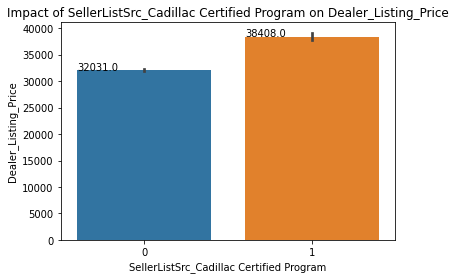

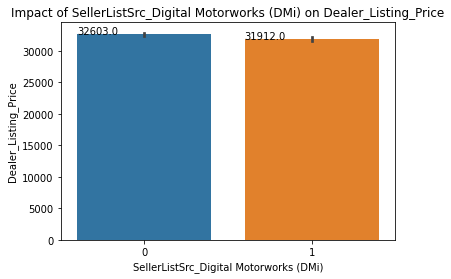

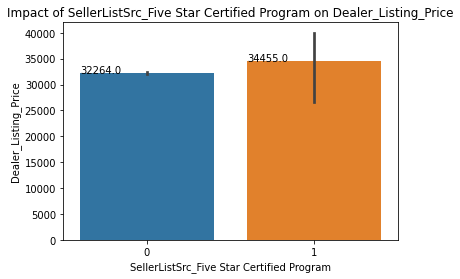

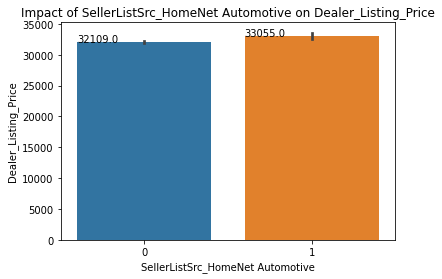

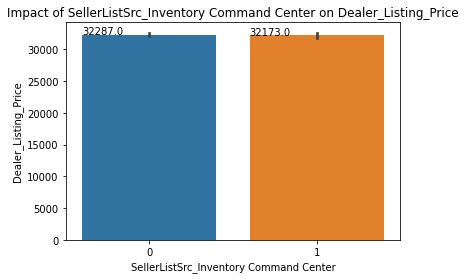

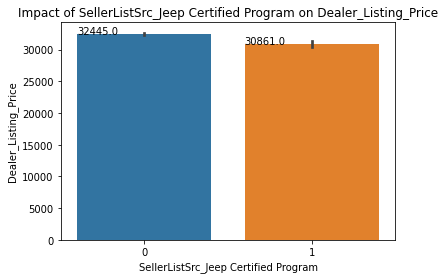

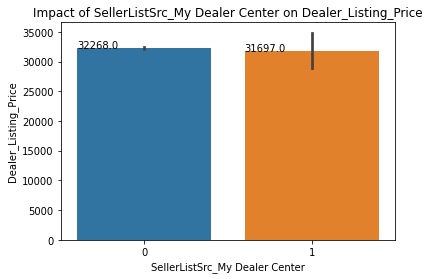

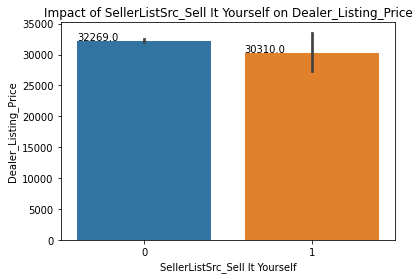

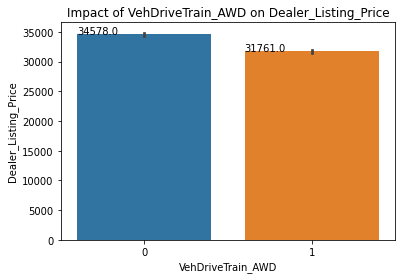

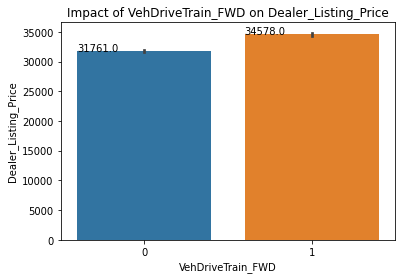

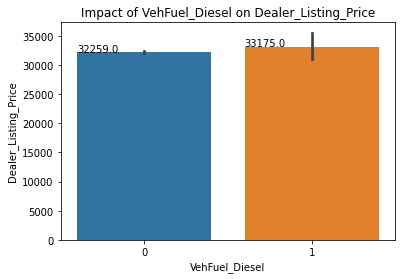

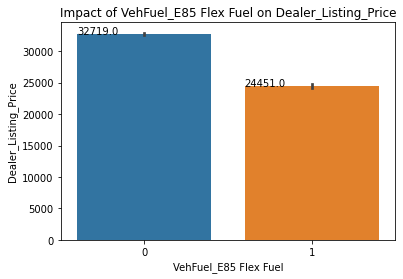

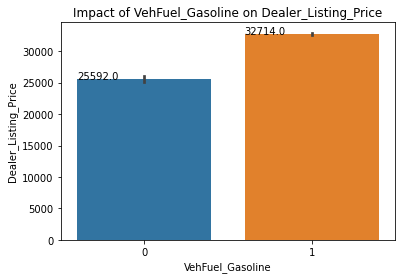

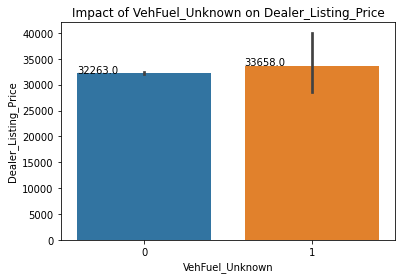

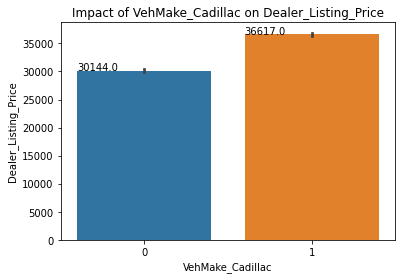

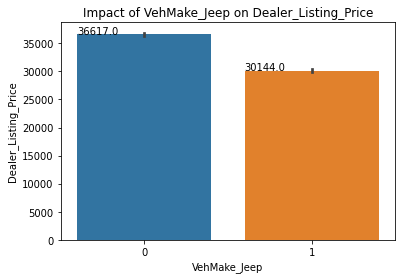

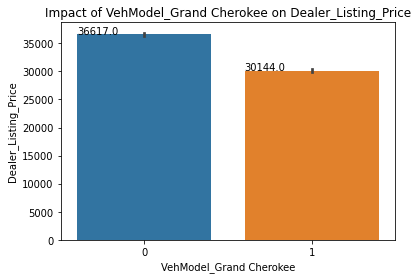

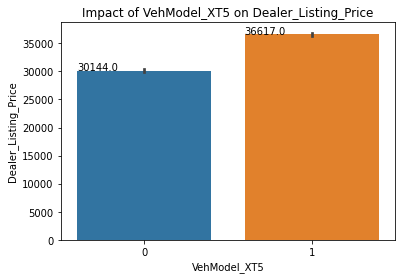

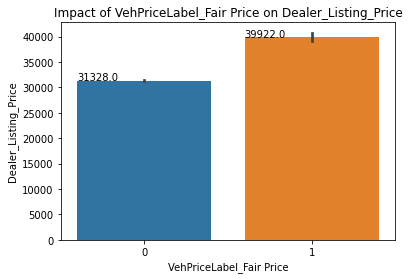

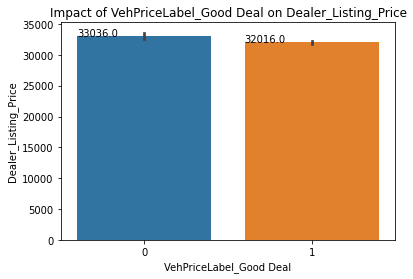

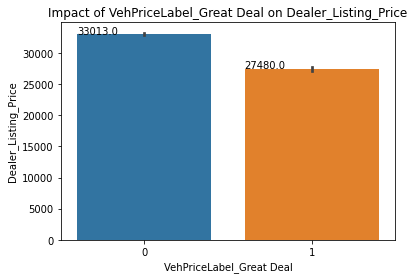

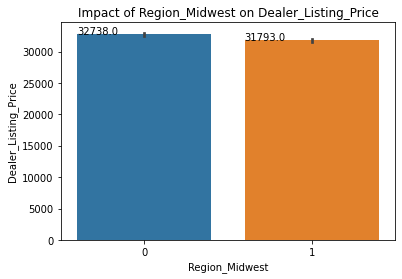

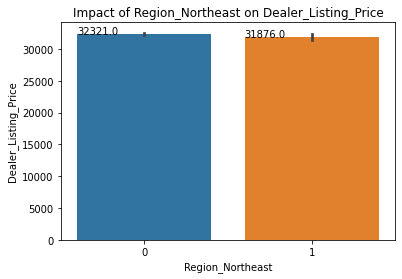

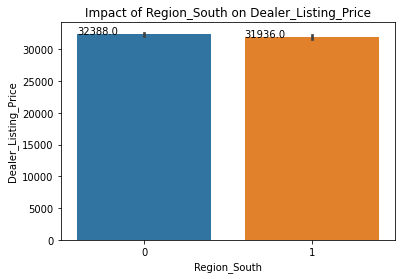

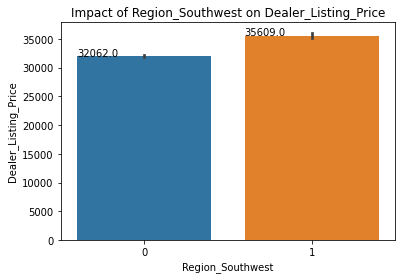

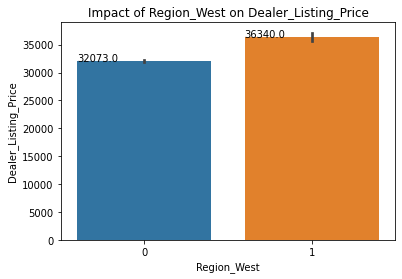

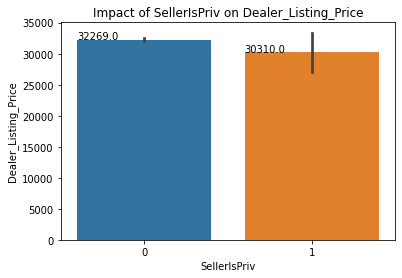

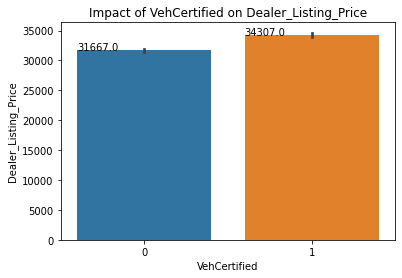

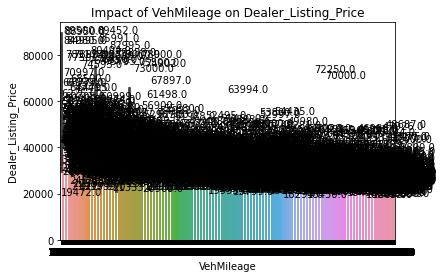

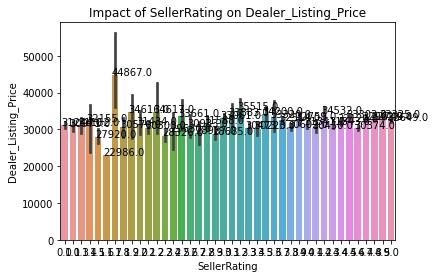

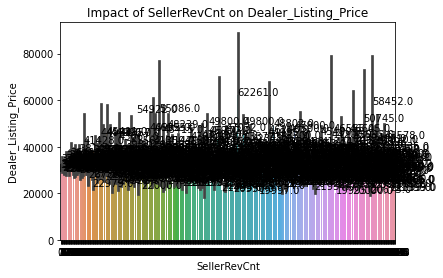


KeyboardInterrupt



In [38]:
for col in df_model.columns[:33]:
    ax = sns.barplot(x=col, y='Dealer_Listing_Price', data=df_model)
    #pl.ax.set_ylim(0,100)
    plt.title("Impact of {} on Dealer_Listing_Price".format(col))
    
    for p in ax.patches:
        txt = str(p.get_height().round(0))
        txt_x = p.get_x()
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
    
    plt.show()

### Conclusion

Initial analysis shows the following variables are really significant in determining the Vehicle Trim of the corresponding Listing :-
SellerListSrs_Cadillac Certified Program, VehFuel_E85 Flex Fuel, VehFuel_Gasoline, VehMake_Cadillac,
VehMake_Jeep, VehModel_Grand Cherokee, VehModel_XT5, VehPriceLabel_Fair Price, VehPriceLabel_Great Deal

## 1.5 Divide data into train and test set

In [39]:
df_model.columns

Index(['SellerListSrc_Cadillac Certified Program',
       'SellerListSrc_Digital Motorworks (DMi)',
       'SellerListSrc_Five Star Certified Program',
       'SellerListSrc_HomeNet Automotive',
       'SellerListSrc_Inventory Command Center',
       'SellerListSrc_Jeep Certified Program',
       'SellerListSrc_My Dealer Center', 'SellerListSrc_Sell It Yourself',
       'VehDriveTrain_AWD', 'VehDriveTrain_FWD', 'VehFuel_Diesel',
       'VehFuel_E85 Flex Fuel', 'VehFuel_Gasoline', 'VehFuel_Unknown',
       'VehMake_Cadillac', 'VehMake_Jeep', 'VehModel_Grand Cherokee',
       'VehModel_XT5', 'VehPriceLabel_Fair Price', 'VehPriceLabel_Good Deal',
       'VehPriceLabel_Great Deal', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southwest', 'Region_West', 'SellerIsPriv',
       'VehCertified', 'VehMileage', 'SellerRating', 'SellerRevCnt',
       'VehListdays', 'VehTenure', 'Dealer_Listing_Price'],
      dtype='object')

In [40]:
X = df_model.iloc[:,:df_model.shape[1]-1]

In [41]:
Y = df_model.iloc[:,df_model.shape[1]-1:df_model.shape[1]]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state = 42)

In [43]:
print ('In training data, X variables contain {} rows and columns respectively and Y variable contain {} rows and columns respectively '.format(X_train.shape, y_train.shape))
print ('In test data, X variables contain {} rows and columns respectively and Y variable contain {} rows and columns respectively '.format(X_test.shape, y_test.shape))

In training data, X variables contain (4372, 33) rows and columns respectively and Y variable contain (4372, 1) rows and columns respectively 
In test data, X variables contain (1874, 33) rows and columns respectively and Y variable contain (1874, 1) rows and columns respectively 


In [44]:
X_train.isna().sum()

SellerListSrc_Cadillac Certified Program     0
SellerListSrc_Digital Motorworks (DMi)       0
SellerListSrc_Five Star Certified Program    0
SellerListSrc_HomeNet Automotive             0
SellerListSrc_Inventory Command Center       0
SellerListSrc_Jeep Certified Program         0
SellerListSrc_My Dealer Center               0
SellerListSrc_Sell It Yourself               0
VehDriveTrain_AWD                            0
VehDriveTrain_FWD                            0
VehFuel_Diesel                               0
VehFuel_E85 Flex Fuel                        0
VehFuel_Gasoline                             0
VehFuel_Unknown                              0
VehMake_Cadillac                             0
VehMake_Jeep                                 0
VehModel_Grand Cherokee                      0
VehModel_XT5                                 0
VehPriceLabel_Fair Price                     0
VehPriceLabel_Good Deal                      0
VehPriceLabel_Great Deal                     0
Region_Midwes

## 1.6 Base Model

In [45]:
## Create a Random Forest Classifier

base_rfm = RandomForestRegressor(random_state=42)

In [46]:
## Fit the model on the Training data

base_model = base_rfm.fit(X_train, y_train)


features = {}
for feature, importance in zip(X_train.columns, base_rfm.feature_importances_):
    features[feature] = importance
importances = pd.DataFrame.from_dict(features, orient='index').rename(columns={0: 'Gini-imp'})
#importances.sort_values(by='Gini-imp')[::-1][:10].plot(kind='barh')
importances.sort_values(by='Gini-imp',ascending=False)

,Gini-imp
VehTenure,0.328918
VehMileage,0.205069
VehListdays,0.087120
VehPriceLabel_Fair Price,0.085682
SellerRevCnt,0.062894
SellerRating,0.044114
VehMake_Cadillac,0.027123
VehMake_Jeep,0.018818
VehModel_XT5,0.017626
VehModel_Grand Cherokee,0.016842


### 1.7  Association Matrix by Cramer's V formula

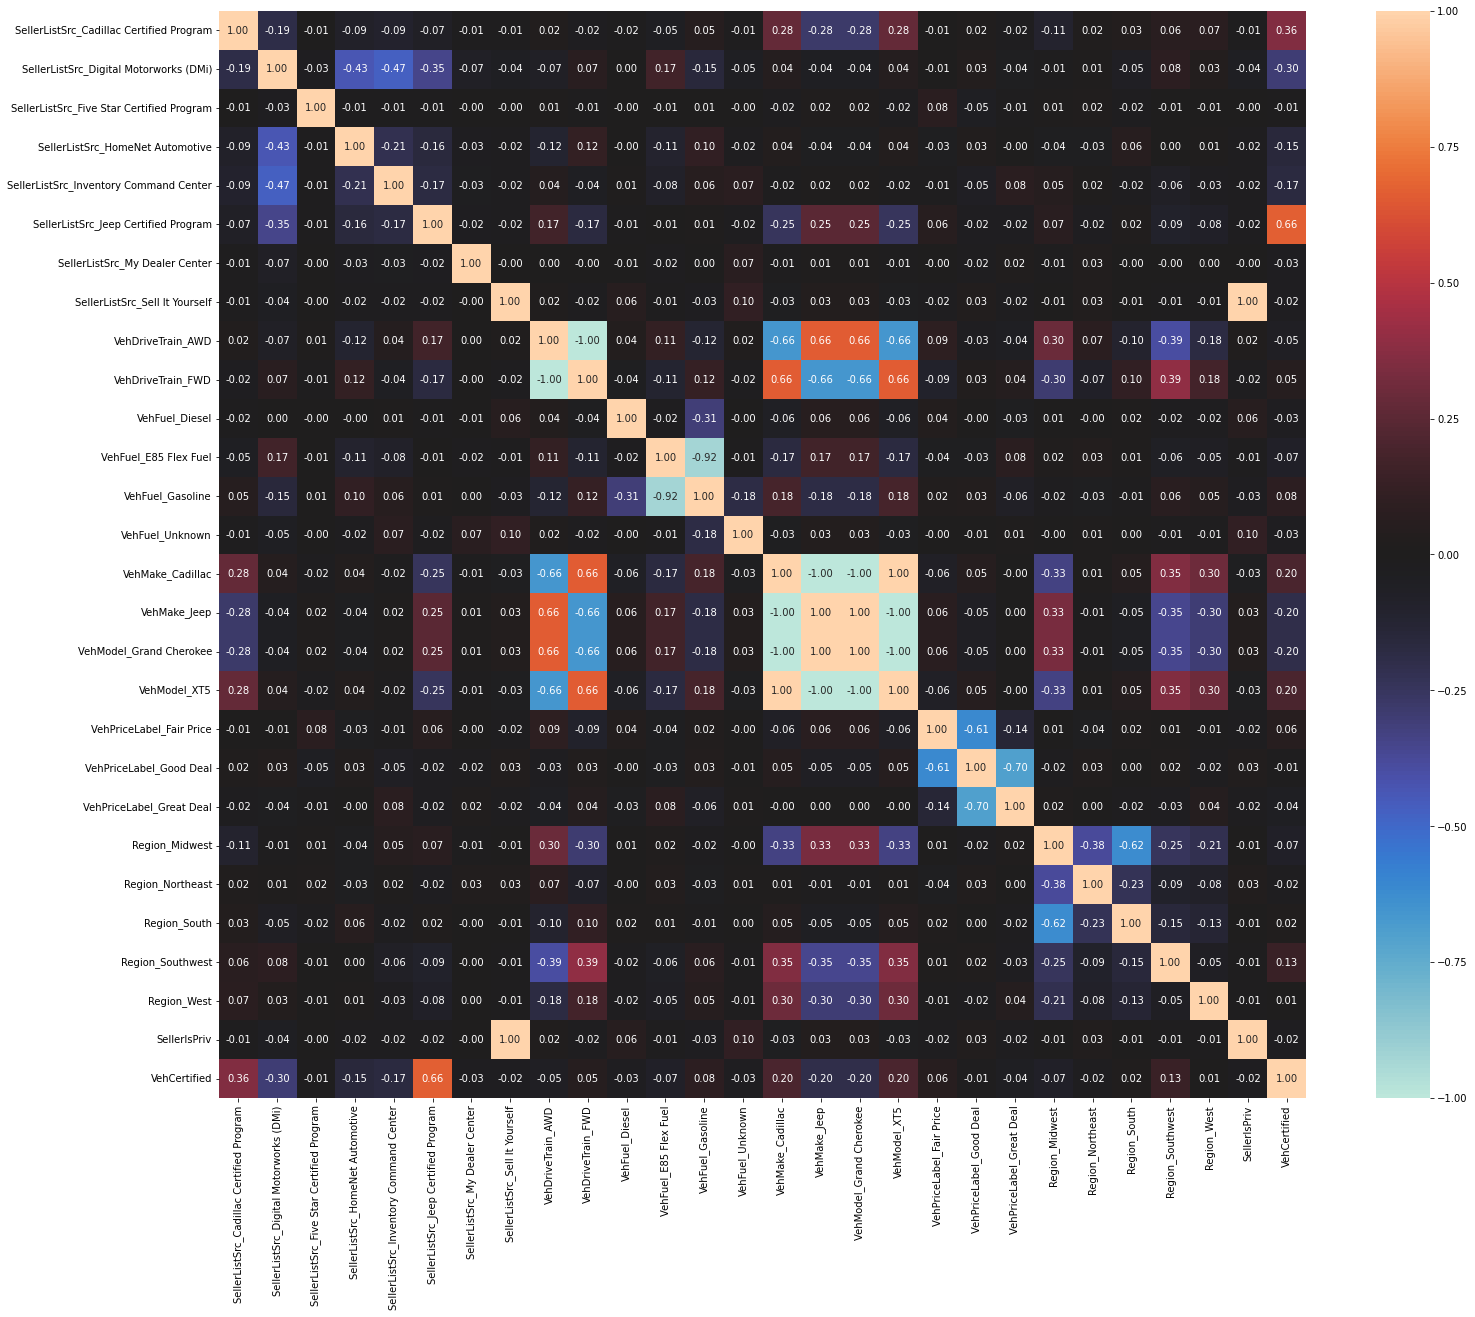

In [47]:
from dython.nominal import associations

cat_corr_X = X_train.iloc[:,:-5]

categorical_correlation= associations(cat_corr_X, filename= 'categorical_correlation.png', figsize=(25,20))

## 1.8 Final List of Features

In [48]:
feature_list = ['VehTenure','VehMileage','VehListdays','VehPriceLabel_Fair Price','SellerRevCnt','SellerRating','VehMake_Cadillac']

In [49]:
##build the base model on Train data on all features , test the predictions, post that do hyperparameter tuning and cross validation

In [50]:
predictions_base = base_model.predict(X_test)

In [51]:
# evaluate predictions
mse_base = mean_squared_error(y_test, predictions_base)

In [52]:
rmse_base = np.sqrt(mse_base)

## 1.9 Cross validation set roc auc score

In [53]:
from sklearn.model_selection import cross_val_score,KFold
kf_base=KFold(n_splits=15)
score_base=cross_val_score(base_model,X_train,y_train,scoring='neg_mean_squared_error',cv=kf_base)

In [54]:
print("RMSE score on cross validation set :{:.2f}".format(np.sqrt(score_base.mean()*(-1))))
print("RMSE score on test set :", round(rmse_base,2))

RMSE score on cross validation set :4478.23
RMSE score on test set : 4839.16


In [55]:
from sklearn.metrics import mean_absolute_percentage_error

In [56]:
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(y_test, predictions_base))

Mean Absolute Percentage Error (MAPE): 0.08114236443877788


In [57]:
print('R squared value:', r2_score(y_test, predictions_base),'Adj R Squared value:',(1 - (1-r2_score(y_test, predictions_base)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

R squared value: 0.6293598929135542 Adj R Squared value: 0.6227125431668952


## 2.1  CLASS BALANCING APPROACH using SMOTE package 

In [58]:
# sm = SMOTE(random_state = 2)
# X_train1,y_train1 = sm.fit_resample(X_train,y_train)

In [59]:
# ##Comparing the distribution of records in Target variable column between Exited and Non-exited individuals in **inbalanced Vs balanced** dataset

# print('In imbalanced training data the distribution of non exited customers to exited customers is as follows:')
# pd.Series(y_train['Vehicle_Trim']).value_counts()

In [60]:
# print('In balanced training data the distribution of non exited customers to exited customers is as follows:')
# pd.Series(y_train1['Vehicle_Trim']).value_counts()

## 2.1 Hyper Parameter Tuning 

In [63]:
base_rfm = RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,8],
    'min_samples_split' : [2,6],
    'min_samples_leaf' : [4],
    'bootstrap': [True,False]
}

In [64]:
cv_rfm = GridSearchCV(estimator=base_rfm, param_grid=param_grid, cv= 5)
cv_rfm.fit(X_train[feature_list], y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [4], 'min_samples_split': [2, 6],
                         'n_estimators': [300, 500]})

In [65]:
cv_rfm.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 500}

## 2.1 Fit the model on the Training data based on the tuned hyper parameters

In [208]:
rfc1=RandomForestRegressor(random_state=42, max_features='log2', n_estimators= 200, max_depth=7, min_samples_leaf= 5 , criterion='entropy')

In [209]:
rfc1.fit(X_train[feature_list],y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=5, n_estimators=200, random_state=42)

## 2.2 Cross-validation set roc_auc score

In [161]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=15)
score=cross_val_score(rfc1,X_train[feature_list],y_train,scoring='neg_mean_squared_error',cv=kf)

print("Average Cross Validation roc_auc score is :{:.2f}%".format(score.mean()*100))

NameError: name 'rfc1' is not defined

## 2.3  Model Performance on Test Data using Random Forest

In [211]:
predictions = rfc1.predict(X_test[feature_list])
# evaluate predictions
roc_auc_sc = roc_auc_score(y_test, predictions)

#print('Accuracy on train set containing balanced data : {:.2f}%'.format(rfc1.score(X_train[feature_list], y_train)*100))
print("roc_auc score on test set : %.2f%%" % (roc_auc_sc * 100.0))

roc_auc score on test set : 82.28%


### 2.3.1 Confusion Matrix

In [212]:
# actual values
actual = y_test.values.tolist()
# predicted values
predicted = predictions.tolist()

# confusion matrix
con_matrix = confusion_matrix(actual,predicted, labels=[0,1])
print('Confusion matrix : \n',con_matrix)

Confusion matrix : 
 [[562 279]
 [ 21 906]]


### 2.3.2 Classification Report

In [213]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("\nTPR or Sensitivity or Recall is {:.2f}".format(tp/(tp+fn)),"\nPrecision is {:.2f}".format(tp/(tp+fp)), "\nFNR is {:.2f}".format(fn/(fn+tp)),"\nFPR or (1-Specificity) is {:.2f}".format(fp/(fp+tn)),"\nTNR is {:.2f}".format(tn/(tn+fp),"\nPrecision is {:.2f}".format(tp/(tp+fp))))


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('\nClassification report : \n',matrix)


TPR or Sensitivity or Recall is 0.98 
Precision is 0.76 
FNR is 0.02 
FPR or (1-Specificity) is 0.33 
TNR is 0.67

Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.98      0.86       927
           0       0.96      0.67      0.79       841

    accuracy                           0.83      1768
   macro avg       0.86      0.82      0.82      1768
weighted avg       0.86      0.83      0.83      1768



### 4.3.4  Confusion Matrix Plot for Logistic Regression Model

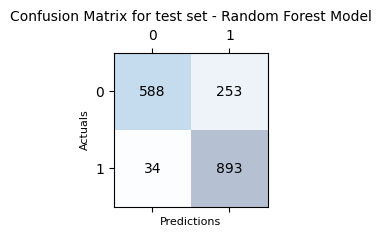

In [157]:
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(con_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(con_matrix.shape[0]):
    for j in range(con_matrix.shape[1]):
        ax.text(x=j, y=i,s=con_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=8)
plt.ylabel('Actuals', fontsize=8)
plt.title('Confusion Matrix for test set - Random Forest Model', fontsize=10)
plt.show()

## 4.3.5  ROC AUC score on test data

The roc_auc score is: 0.8312451016986764


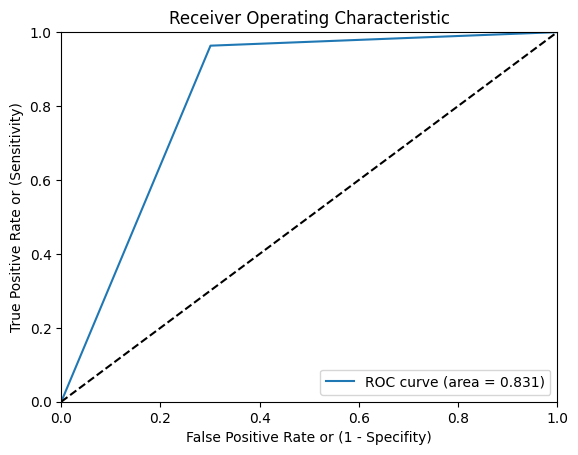

In [158]:
# Compute fpr, tpr, thresholds and roc auc

fpr, tpr, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)
gini_coefficient = (2*roc_auc)-1

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


print('The roc_auc score is:', roc_auc)

## Load the Test Dataset

In [ ]:
## Prepare the data along with imputation of missing values and one hot encoding of certain variables. Finally select the list of variables used for final model building and predict the values

In [ ]:
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
## Calculate the 

In [3]:
!pip uninstall -y pandoc

Found existing installation: pandoc 2.3
Uninstalling pandoc-2.3:
  Successfully uninstalled pandoc-2.3


In [4]:
conda install pandoc

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\souma\anaconda3

  added / updated specs:
    - pandoc


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandoc-2.12                |       haa95532_3        14.6 MB
    ------------------------------------------------------------
                                           Total:        14.6 MB

The following NEW packages will be INSTALLED:

  pandoc             pkgs/main/win-64::pandoc-2.12-haa95532_3




pandoc-2.12          | 14.6 MB   |            |   0% 
pandoc-2.12          | 14.6 MB   | 1          |   1% 
pandoc-2.12          | 14.6 MB   | 8          |   8% 
pandoc-2.12          | 14.6 MB   | #5         |  16% 
pandoc-2.12          | 14.6 MB   | ##3        |  24% 
pandoc-2.12          | 14.6 MB   | ###1       |  31% 
pandoc-2.12          | 14.6 MB   | ###9       |  39% 
pandoc-2.12       



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [4]:
! pip install pandoc

  Using cached pandoc-2.3-py3-none-any.whl


In [5]:
import pandoc